In [32]:
import pickle

# Load the augmented images and labels from the file
with open('../local_data/all_b_chosen_data_useable.pickle', 'rb') as f:
    augmented_images, augmented_labels = pickle.load(f)

In [33]:
augmented_images.shape, augmented_labels.shape

((800, 512, 512, 3), (800, 5))

In [34]:
import tensorflow as tf
import numpy as np

augmented_images = np.array(augmented_images, dtype=np.float32)
augmented_labels = np.array(augmented_labels, dtype=np.int32)

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(augmented_images, augmented_labels, test_size=0.2, random_state=42)

In [35]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((640, 512, 512, 3), (640, 5), (160, 512, 512, 3), (160, 5))

In [63]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, Normalization, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

base_model = keras.applications.MobileNetV2(input_shape=(512, 512, 3), include_top=False, weights='imagenet')

base_model.trainable = False

x = base_model.output
x = Conv2D(512, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Normalization()(x)

x = Conv2D(512, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Normalization()(x)

x = GlobalAveragePooling2D()(x)
x = Normalization()(x)
x = Flatten()(x)

x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(5, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=predictions)

C:\Users\juliu\AppData\Local\Temp\ipykernel_11268\3327756496.py:7: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = keras.applications.MobileNetV2(input_shape=(512, 512, 3), include_top=False, weights='imagenet')


In [64]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [68]:
from tensorflow.keras.callbacks import ModelCheckpoint
callbacks = [ModelCheckpoint(filepath='../models/all_chosen_pre_model_9.keras', monitor='val_loss', mode='min', save_best_only=True)]

history = model.fit(
  X_train,
  y_train, 
  epochs=20, 
  batch_size=32,
  validation_data=(X_val, y_val),
  callbacks=callbacks
  )

Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.5693 - loss: 0.0112 - val_accuracy: 0.3938 - val_loss: 0.2744
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.5106 - loss: 0.0105 - val_accuracy: 0.4875 - val_loss: 0.3351
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.5887 - loss: 0.0170 - val_accuracy: 0.5125 - val_loss: 0.2886
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.6189 - loss: 0.0089 - val_accuracy: 0.4750 - val_loss: 0.2937
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.5777 - loss: 0.0077 - val_accuracy: 0.4812 - val_loss: 0.3009
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.5544 - loss: 0.0048 - val_accuracy: 0.4938 - val_loss: 0.3081
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.5748 - loss: 0.0062 - val_accuracy: 0.4750 - val_loss: 0.3063
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.5205 - loss: 0.0050 - val_accuracy: 0.4187 - val_loss:

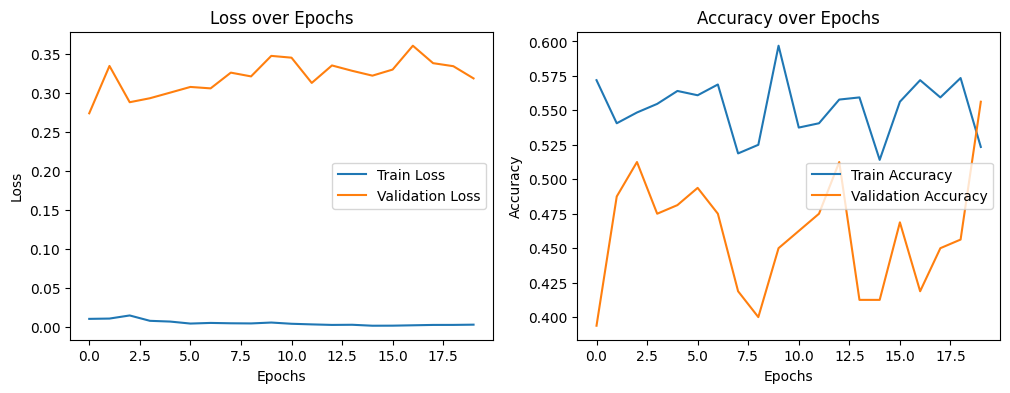

In [69]:
# Optionally, plot training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')

plt.show()

In [70]:
model.save('../models/all_chosen_pre_model_9.h5')